## Gene Expression RNA-Seq Classification 

#### Data Exploration

This dataset contains two data files. One file contains the sample numbers and names. The othe file contains our RNA-Seq data set that shows the gene expression levels of ~20,000 genes for each samples. 

From this data set, I will explore different classification models and see which model can accurately predict tumors based on certain gene expression levels. 

This dataset only contains information on these tumors:
- BRCA
- KIRC
- COAD
- LUAD 
- PRAD

**Pipeline:**
1. &#9745; Data Exploration 
    - &#9745; Null values
    - &#9745; Class Distribution 
    - &#9745; Balance Dataset

### Import packages

In [1]:
# Functions 
from functions import *

# Data Handling 
import pandas as pd
import numpy as np
from collections import Counter

# Data Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# SMOTE for imbalanced data
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle


### Read Data

In [2]:
# Files 
data_file = "/Users/kim/Desktop/repos/RNA-Seq_GeneExpression_Model/Datasets/data.csv"
labels_file = "/Users/kim/Desktop/repos/RNA-Seq_GeneExpression_Model/Datasets/labels.csv"

# Load data
data_df = pd.read_csv(data_file)
labels_df = pd.read_csv(labels_file)

# Merge the two dataframes together
gene_exp_df = pd.merge(data_df, labels_df, on = 'Unnamed: 0', how = 'inner')

# Shift this column to the third column
last_column = gene_exp_df.iloc[:,-1]
gene_exp_df = gene_exp_df.drop(gene_exp_df.columns[-1], axis = 1)
gene_exp_df.insert(1, last_column.name, last_column)

gene_exp_df

,Unnamed: 0,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,BRCA,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,LUAD,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,COAD,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,PRAD,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


### Data Exploration and Cleaning

#### Explore Data

In [3]:
# Check the shape of our dataframe
gene_exp_df.shape

(801, 20533)

In [4]:
# Check the first few rows of the dataframe
gene_exp_df.head()

,Unnamed: 0,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [5]:
gene_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Columns: 20533 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(2)
memory usage: 125.5+ MB


#### Check for null values 

In [6]:
# Check if there's any null values in both of our dataframe
print_columns_with_null(gene_exp_df)

No columns have null values.


#### Check for columns with all zero values

In [7]:
# Print out the count of columns with all zero values and atleast one non-zero values
Columns_counts_df = count_columns_with_zeros(gene_exp_df)
Columns_counts_df

,Category,Count
0,All Zeros,267
1,Non-Zero,20266


##### Visualize using a bar plot

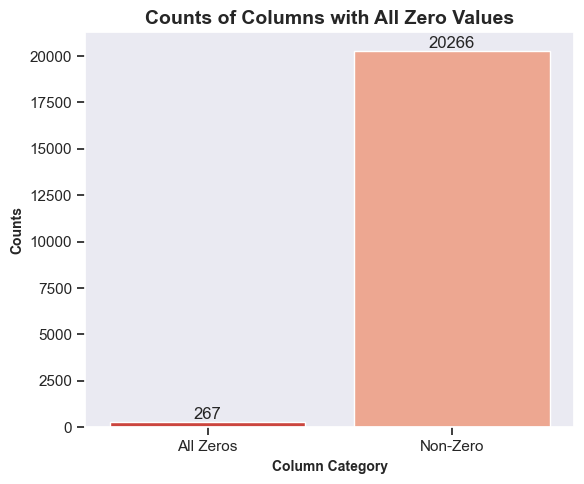

In [8]:
# Setting up figure settings
sns.set(style="dark", font="sans serif")
fig_dims = (6, 5)

# Create the bar graph
f, (ax) = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x = 'Category', y = 'Count',
                data = Columns_counts_df,
                palette='Reds_r',
                ax=ax)

# Set up labels
plt.xlabel('Column Category', fontsize=10, loc= 'center', fontweight = 'bold');
plt.ylabel('Counts', fontsize=10, loc= 'center', fontweight = 'bold');
plt.title('Counts of Columns with All Zero Values', fontsize=14, fontweight = 'bold')

# Add ticks to both x and y axis
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Put bar labels on each bars
for container in ax.containers:
    ax.bar_label(container, size = 12)

# Format graph 
# f.autofmt_xdate()
plt.tight_layout()
plt.show()

##### Testing:
- Let's double check that we completely got rid off all of the columns with all zero values

In [9]:
# Assign the second column to a variable 
second_column = gene_exp_df['gene_0']

# Check if there are any non-zero values in the second column
any_non_zero_values = (second_column != 0).any()

# Print the result
print(f"Are there any non-zero values in the second column? {any_non_zero_values}")

# Add all the non-zero values into a list
non_zero_values = second_column[second_column != 0].tolist()

# Print the list of non-zero values
print("Non-zero values in the second column:")
print(non_zero_values)

Are there any non-zero values in the second column? True
Non-zero values in the second column:
[0.341758085079, 0.631523406479, 1.48233202075, 0.66775590841, 0.544089666549, 0.81893234401, 0.412944073369, 0.531867995606, 0.328721595402, 0.34164424053, 0.565889584403, 0.698840770207, 0.624709202229, 0.588900487699, 1.21915302835, 0.487383443037, 0.337539842197, 0.547745938687, 1.24110797493, 0.873340751556, 0.757450016231, 0.646439185614, 0.566669050913, 0.542010355537, 0.844064214792, 0.553163870509, 0.450379880071, 0.283921772308, 0.664118707339, 0.325156117742, 0.363339311629, 0.807767061766, 0.408603179343, 0.404031139622, 0.43658829366]


From this, we saw that there are non-zero values in our second column which means that our function worked.

#### Class Distribution
- Check the unique types of tumors
- Check to see if our data is imbalanced

In [10]:
# Check our unique types of tumors 
class_distribution = Counter(gene_exp_df['Class'])

# Save as a dataframe
class_column_names = ['Class', 'Distribution']
class_dist_df = dict_to_df(class_distribution, class_column_names)
class_dist_df

,Class,Distribution
0,PRAD,136
1,LUAD,141
2,BRCA,300
3,KIRC,146
4,COAD,78


##### Visualize using a bar plot

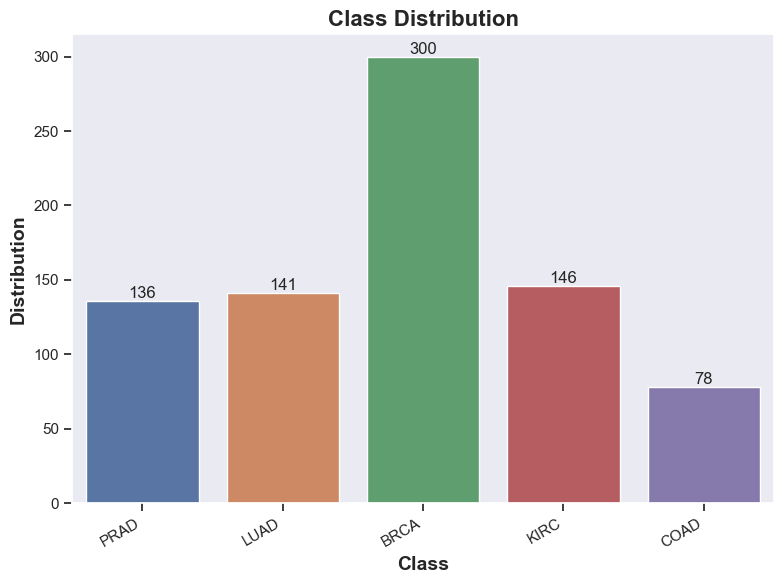

In [11]:
# Setting up figure settings
sns.set(style="dark", font="sans serif")
fig_dims = (8, 6)

# Create the bar graph
f, (ax) = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x = 'Class', y = 'Distribution',
                data = class_dist_df,
                palette='deep',
                ax=ax)

# Set up labels
plt.xlabel('Class', fontsize=14, loc= 'center', fontweight = 'bold');
plt.ylabel('Distribution', fontsize=14, loc= 'center', fontweight = 'bold');
plt.title('Class Distribution', fontsize=16, fontweight = 'bold')

# Add ticks to both x and y axis
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Put bar labels on each bars
for container in ax.containers:
    ax.bar_label(container, size = 12)

# Format graph 
f.autofmt_xdate()
plt.tight_layout()
plt.show()

**We see that BRCA has a higher occurence in our data than any other types and COAD as the lowest.**
- We can say that this data is imbalanced and will not be ideal to train our classification model as it will favor a certain tumor type and can lead to false classification for those underrepresented in our data. 

##### SMOTE (Synthetic Minority Over-Sampling Technique)
- Generates synthetic examples of the minority classes to balance the class distribution.

In [12]:
# Extract features (X) and target variable (y)
X = gene_exp_df.drop(['Unnamed: 0','Class'], axis=1)  # Drop non-feature columns
y = gene_exp_df['Class']

# Apply SMOTE to generate synthetic samples
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Class'] = y_resampled

# Shuffle the DataFrame
gene_exp_df = shuffle(df_resampled, random_state=42) # Add randomness to our data 

# Shift this column to the third column
last_column = gene_exp_df.iloc[:,-1]
gene_exp_df = gene_exp_df.drop(gene_exp_df.columns[-1], axis = 1)
gene_exp_df.insert(0, last_column.name, last_column)

# Count the occurrences of each class in the shuffled DataFrame
resampled_distribution = gene_exp_df['Class'].value_counts()
print(resampled_distribution)

# Print the resampled DataFrame
print(gene_exp_df)

/var/folders/fj/1bp6c_7s3b51sm954hmfznt40000gn/T/ipykernel_19640/373565958.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['Class'] = y_resampled


KIRC    300
PRAD    300
BRCA    300
COAD    300
LUAD    300
Name: Class, dtype: int64
     Class    gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
1116  KIRC  0.053131  2.185391  2.129093  6.374629   9.551359     0.0   
1368  PRAD  0.000000  0.870955  3.010615  7.078216  10.104074     0.0   
422   BRCA  0.000000  4.122805  2.939922  6.730137   9.508001     0.0   
413   PRAD  0.000000  3.926882  4.990551  6.562079   8.970868     0.0   
451   BRCA  0.000000  2.543372  2.564476  6.299157   9.783317     0.0   
...    ...       ...       ...       ...       ...        ...     ...   
1130  KIRC  0.000000  1.776256  2.643057  6.047797  10.132871     0.0   
1294  LUAD  0.000000  4.468543  4.617051  6.815985   9.311741     0.0   
860   COAD  0.000000  2.923804  3.602580  7.662982   9.745030     0.0   
1459  PRAD  0.807538  1.973383  3.421670  6.032660  10.683836     0.0   
1126  KIRC  0.000000  1.993169  2.547753  6.991716   9.275809     0.0   

        gene_6    gene_7  gene_8  ...

##### Visualize the distribution of the classes in our dataframe after applying SMOTE to balance it

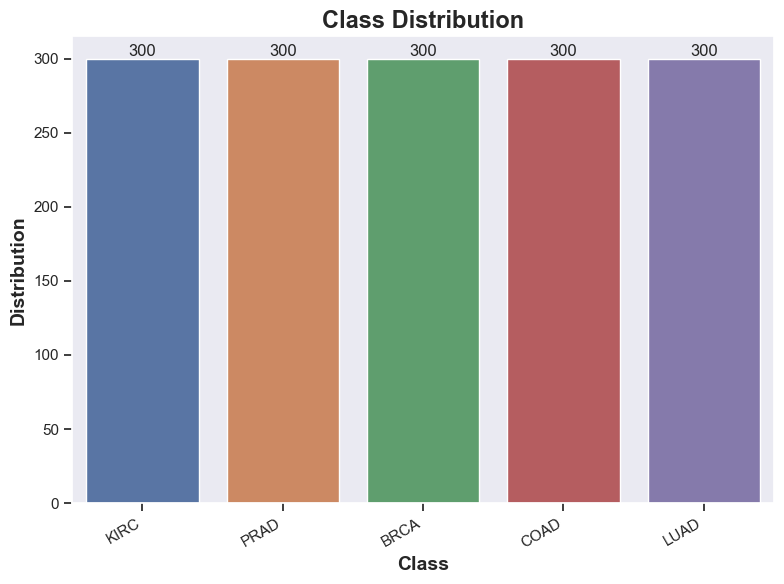

In [13]:
# Check our the count of each classes in the balanced dataset
class_distribution_resampled = Counter(gene_exp_df['Class'])
class_column_names= ['Class', 'Distribution']
resampled_distribution_df = dict_to_df(class_distribution_resampled, class_column_names)
resampled_distribution_df

# Visualize using a bar plot

# Setting up figure settings
sns.set(style="dark", font="sans serif")
fig_dims = (8, 6)

# Create the bar graph
f, (ax) = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x = 'Class', y = 'Distribution',
                data = resampled_distribution_df,
                palette='deep',
                ax=ax)

# Set up labels
plt.xlabel('Class', fontsize=14, loc= 'center', fontweight = 'bold');
plt.ylabel('Distribution', fontsize=14, loc= 'center', fontweight = 'bold');
plt.title('Class Distribution', fontsize=17, fontweight = 'bold')

# Add ticks to both x and y axis
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Put bar labels on each bars
for container in ax.containers:
    ax.bar_label(container, size = 12)

# Format graph 
f.autofmt_xdate()
plt.tight_layout()
plt.show()

#### Save our cleaned Data as a CSV file
- This will be used for our Data Pre-processing step

In [14]:
# Subfolder Path
subfolder_path = "/Users/kim/Desktop/repos/RNA-Seq_GeneExpression_Model/Datasets"

# CSV filename
filename = "Gene_Expression_Data.csv"

save_dataframe_to_csv(gene_exp_df, subfolder_path, filename)